In [1]:
# Notebook 03 : Prédiction du Débit 5G - Modèle LSTM + CNN

## 📥 1. Imports et Préparation des données temporelles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Charger les données traitées
file_path = "D:\\4DATA\SEMESTER2\PI\DATASET\mm-5G.csv"
df = pd.read_csv(file_path)

# Création de colonnes utiles
df['debit_brut'] = df['Throughput']
df['debit_lisse'] = df['Throughput'].ewm(span=8, adjust=False).mean()
df['delta'] = df['debit_brut'] - df['debit_lisse']
df['variation_relative'] = df['delta'] / (df['debit_lisse'] + 1e-6)
df = df.fillna(0)


<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Souhayl\AppData\Local\Temp\ipykernel_14908\1724594585.py:12: SyntaxWarning: invalid escape sequence '\S'
  file_path = "D:\\4DATA\SEMESTER2\PI\DATASET\mm-5G.csv"


## 📏 2. Normalisation et création des séquences temporelles

## 🔀 3. Split des données d'entraînement et de test

In [4]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


## 🧠 4. Architecture du modèle LSTM + CNN

In [5]:
input_layer = Input(shape=(X.shape[1], X.shape[2]))

# Branche CNN
cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
cnn = Dropout(0.2)(cnn)

# Branche LSTM
lstm = LSTM(64, return_sequences=False)(cnn)

# Densité finale
output = Dense(1)(lstm)
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 28, 64)         │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,921 (132.50 KB)

 Trainable params: 33,921 (132.50 KB)

 Non-trainable params: 0 (0.00 B)

## 🏋️ 5. Entraînement du modèle

In [6]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[es], verbose=1)


Epoch 1/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - loss: 0.0144 - val_loss: 0.0092
Epoch 2/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 47s 35ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 3/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 50s 37ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 4/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 54s 40ms/step - loss: 0.0091 - val_loss: 0.0086
Epoch 5/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 56s 41ms/step - loss: 0.0092 - val_loss: 0.0083
Epoch 6/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 47s 35ms/step - loss: 0.0091 - val_loss: 0.0085
Epoch 7/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 8/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 38s 28ms/step - loss: 0.0090 - val_loss: 0.0083
Epoch 9/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - loss: 0.0090 - val_loss: 0.0084
Epoch 10/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 55s 41ms/step - loss: 0.0088 - val_loss: 0.0083
Epoch 11/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 52s 38ms/step - loss: 0.0088 - val_loss: 0.0083
Epoch 12

## 📈 6. Évaluation et visualisation des résultats

426/426 ━━━━━━━━━━━━━━━━━━━━ 78s 183ms/step


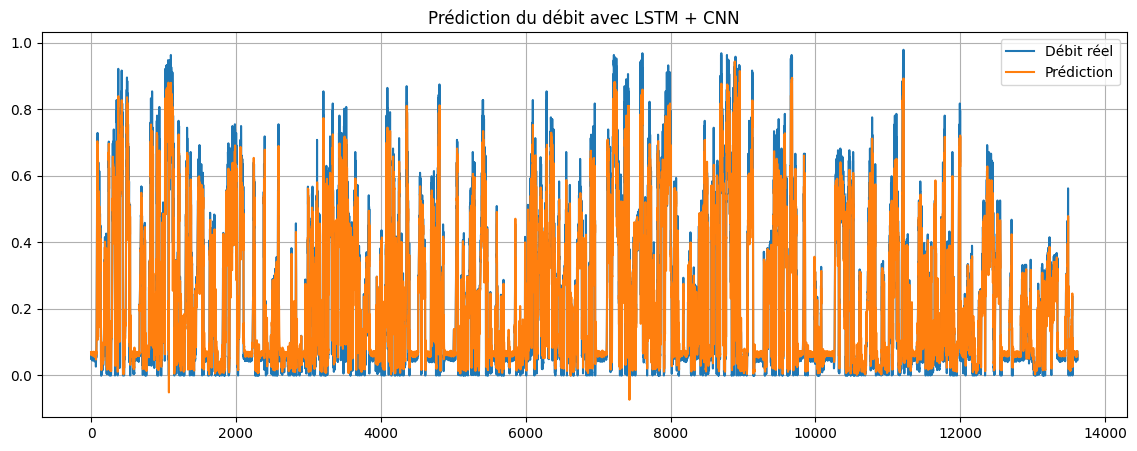

In [7]:
preds = model.predict(X_test)
plt.figure(figsize=(14,5))
plt.plot(y_test, label='Débit réel')
plt.plot(preds, label='Prédiction')
plt.title("Prédiction du débit avec LSTM + CNN")
plt.legend()
plt.grid(True)
plt.show()


## 💾 7. Sauvegarde du modèle

In [8]:
model.save("lstm_cnn_throughput_model.h5")
